In [177]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [178]:
df = pd.read_csv('data.csv')

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [180]:
df['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

In [181]:
df.drop(columns=['Unnamed: 32','id'],axis=1,inplace=True)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [183]:
## Independent Features 

X = df.drop('diagnosis',axis=1)

In [184]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [185]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [186]:
df['diagnosis'] = df['diagnosis'].map({'M':0, 'B':1})

In [187]:
## Dependent Features 

y = df['diagnosis']

In [188]:
from sklearn.linear_model import LogisticRegression

In [189]:
reg = LogisticRegression()

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [192]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [193]:
reg.fit(X_train,y_train)

LogisticRegression()

In [194]:
y_pred = reg.predict(X_test)

In [195]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,confusion_matrix,classification_report

In [196]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9246031746031746
0.017543859649122806
0.017543859649122806
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

[[ 62   1]
 [  2 106]]


## Hyperparameter Tuning

In [197]:
from sklearn.model_selection import RandomizedSearchCV
params = [
    {'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']},
    {'penalty': ['l1'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['liblinear', 'saga']},
    {'penalty': ['elasticnet'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['saga'], 'l1_ratio': [0.5]}
]

In [198]:
rcv = RandomizedSearchCV(estimator=reg,param_distributions=params,cv=5,scoring='accuracy')

In [199]:
import warnings
warnings.filterwarnings('ignore')
rcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions=[{'C': [100, 10, 1.0, 0.1, 0.01],
                                         'penalty': ['l2'],
                                         'solver': ['lbfgs', 'liblinear',
                                                    'newton-cg', 'sag',
                                                    'saga']},
                                        {'C': [100, 10, 1.0, 0.1, 0.01],
                                         'penalty': ['l1'],
                                         'solver': ['liblinear', 'saga']},
                                        {'C': [100, 10, 1.0, 0.1, 0.01],
                                         'l1_ratio': [0.5],
                                         'penalty': ['elasticnet'],
                                         'solver': ['saga']}],
                   scoring='accuracy')

In [200]:
rcv.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 1.0}

In [201]:
y_pred1 = rcv.predict(X_test)

In [202]:
print(r2_score(y_test,y_pred1))
print(mean_absolute_error(y_test,y_pred1))
print(mean_squared_error(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.9246031746031746
0.017543859649122806
0.017543859649122806
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

[[ 62   1]
 [  2 106]]


In [203]:
from sklearn.model_selection import GridSearchCV

In [204]:
gcv = GridSearchCV(estimator=reg,param_grid=params,cv=5,scoring='accuracy')

In [205]:
gcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                          'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                     'saga']},
                         {'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l1'],
                          'solver': ['liblinear', 'saga']},
                         {'C': [100, 10, 1.0, 0.1, 0.01], 'l1_ratio': [0.5],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='accuracy')

In [206]:
gcv.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [207]:
y_pred2 = gcv.predict(X_test)

In [208]:
print(r2_score(y_test,y_pred2))
print(mean_absolute_error(y_test,y_pred2))
print(mean_squared_error(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9748677248677249
0.005847953216374269
0.005847953216374269
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        63
           1       0.99      1.00      1.00       108

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

[[ 62   1]
 [  0 108]]


In [209]:
from sklearn.metrics import roc_curve,roc_auc_score

In [218]:
model_prob = reg.predict_proba(X_test)
model_prob1 = gcv.predict_proba(X_test)
model_prob = model_prob[:,1]
model_prob1 = model_prob1[:,1]

In [221]:
model_auc = roc_auc_score(y_test,model_prob)
model_auc1 = roc_auc_score(y_test,model_prob1)
print(model_auc)
print(model_auc1)

0.9979423868312757
0.9986772486772487


In [223]:
model_fpr,model_tpr,thresholds= roc_curve(y_test,model_prob)
model_fpr1,model_tpr1,thresholds = roc_curve(y_test,model_prob1) 

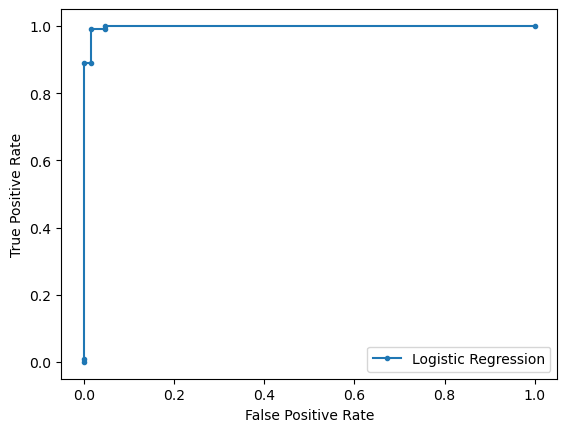

In [226]:
plt.plot(model_fpr,model_tpr,marker='.',label='Logistic Regression')
## Axis Label 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
## Show legend 
plt.legend()
## Show Plot
plt.show()

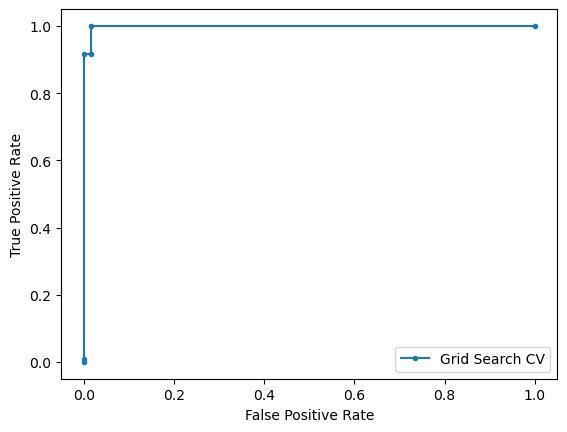

In [227]:
plt.plot(model_fpr1,model_tpr1,marker='.',label='Grid Search CV')
## Axis Label 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
## Show legend 
plt.legend()
## Show Plot
plt.show()

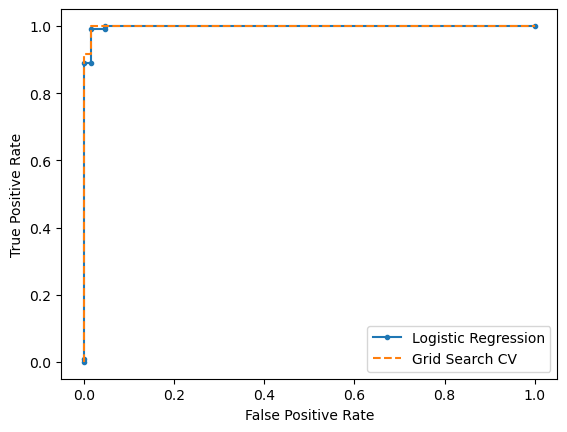

In [230]:
plt.plot(model_fpr,model_tpr,marker='.',label='Logistic Regression')
plt.plot(model_fpr1,model_tpr1,linestyle='--',label='Grid Search CV')
## Axis Label 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
## Show legend 
plt.legend()
## Show Plot
plt.show()